# 위너프로세스 구현

## < 위너 프로세스 정리 >

 
그 전에 ... 

- 확률 과정 : 확률변수가 시간에 따라서 변화하는 패턴을 모델링 한것임.

- 마코프 프로세스 : 확률론적 과정의 한 과정으로, 내일의 값은 과거의 값에는 전혀 영향을 받지 않고 오직 오늘의 값에만 영향을 받는 확률 과정을 뜻한다. 즉 미래 시점의 값은 과거의 값들과는 전혀 연관성이 없다는 것임. 

위저 프로세스는 이러한 마르코프 과정 중에서도 특히 , 평균 변화량은 0 이고, 분산은 1을 따르는 확률 과정을 말한다. 

### 위너 프로세스의 조건

확률 변수 = z 
 z의 변화량은 시간의 변화에 영향을 받고, z는 마코프 프로세스를 따르기 떄문에 각각의 시간에 따른 z값은 다른 시간 간격의 영향을 받지 않는다. 

### 위너 프로세스를 따르는 확률변수의 특징 

(1) z의 변화량은 평균은 0, 분산은 t의 변화량을 값으로 갖는 정규분포를 따른다.
: z의 변화량이 정규분포를 따른다. 즉 시간의 흐름에 따라 z 변화량의 분산이 증가. 이게 시간에 따른 확률적인 움직임을 나타낸다 .  
(2) T시점 분산은 T만큼의 값을 갖는다 .
: z가 T가 경과한 시점에서의 분산이 T와 같다는 것을 의미함. 이건 잘 모르겟ㄴ ㅗ



## #코드 

시간 단계를 생성하고, 임의의 시차를 생성

In [4]:
import numpy as np
import matplotlib.pyplot as plt

t= 500
times =np.linspace(0,1,t)
dt = times[1]-times[0]



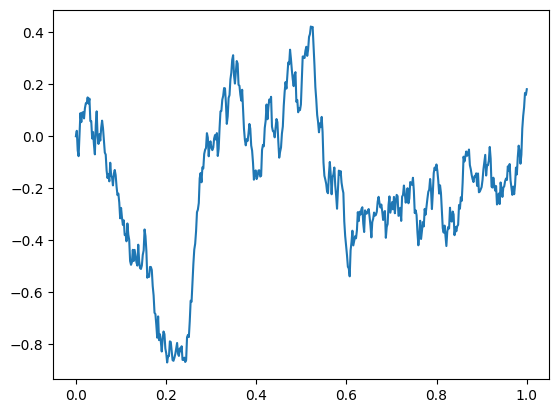

In [8]:
d= 1 
def Wiener(t,times,dt,d):
    W0 = np.zeros(shape = (1,d))
    dW = np.sqrt(dt) * np.random.normal(size = (t-1,d)) # 정규분포따르는 난수 499개 
    # np.sqrt가 없으면 분산이 1이되는데, 데이터에있는 분산(dt)를 쓸것임.
    W = np.concatenate((W0,np.cumsum(dW,axis=0)),axis=0)
    # y 즉 W는 누적합임. 

    ## 시각화 ㄱ 
    plt.plot(times,W)
    plt.show()

Wiener(t,times,dt,d)
    

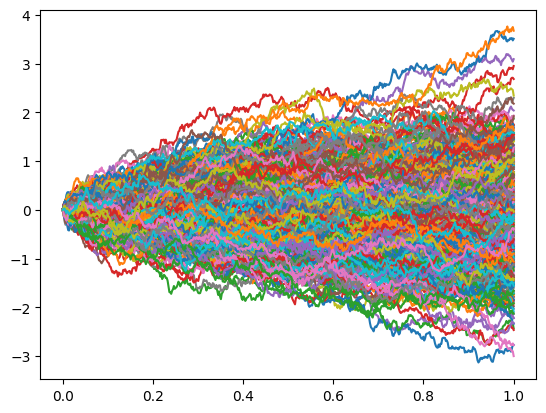

In [9]:
Wiener(t,times,dt,500)

## Geometric Brownian motion 구현

Geometric Brownian Motion은 확률 과정 중 하나로, 주로 금융 분야에서 주가의 움직임을 모델링하는 데 사용되는 확률 프로세스.

주가 등의 금융 변수가 시간에 따라 어떻게 움직이는지 설명하는 모델임.

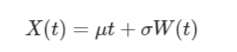

$\mu$ (drift parameter) : 주식 가격의 트랜드를 반영하는 변수, 기울기를 나타낸다


$\sigma$ (volatility parameter) : 주식가격의 변동성을 반영하는 변수, 그래프의 떨리는 정도를 나타냄.

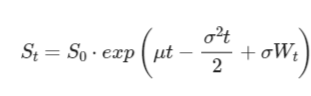



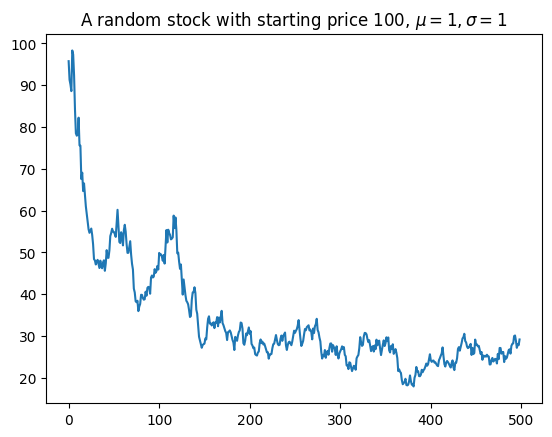

In [10]:
def constant_geometric_wiener(t,dt,mu,sigma):
    x0 = 100 # 초기 주식 가격 
    x = np.exp((mu - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) *
               np.random.normal(size = (t-1,d)))
    x = x0 * x.cumprod(axis=0) # 누적곱 
    
    plt.plot(x, label = "Stock price")
    plt.title(f"A random stock with starting price 100, $\mu = {mu}, \sigma = {sigma}$")
    plt.show()
    
    
constant_geometric_wiener(t,dt,mu=1,sigma = 1) # drift = volatility = 1